# 1. General analytics section

First, and foremost I watched analytics section.


## Macro analysis
Dynamic of ether balance is shown below.

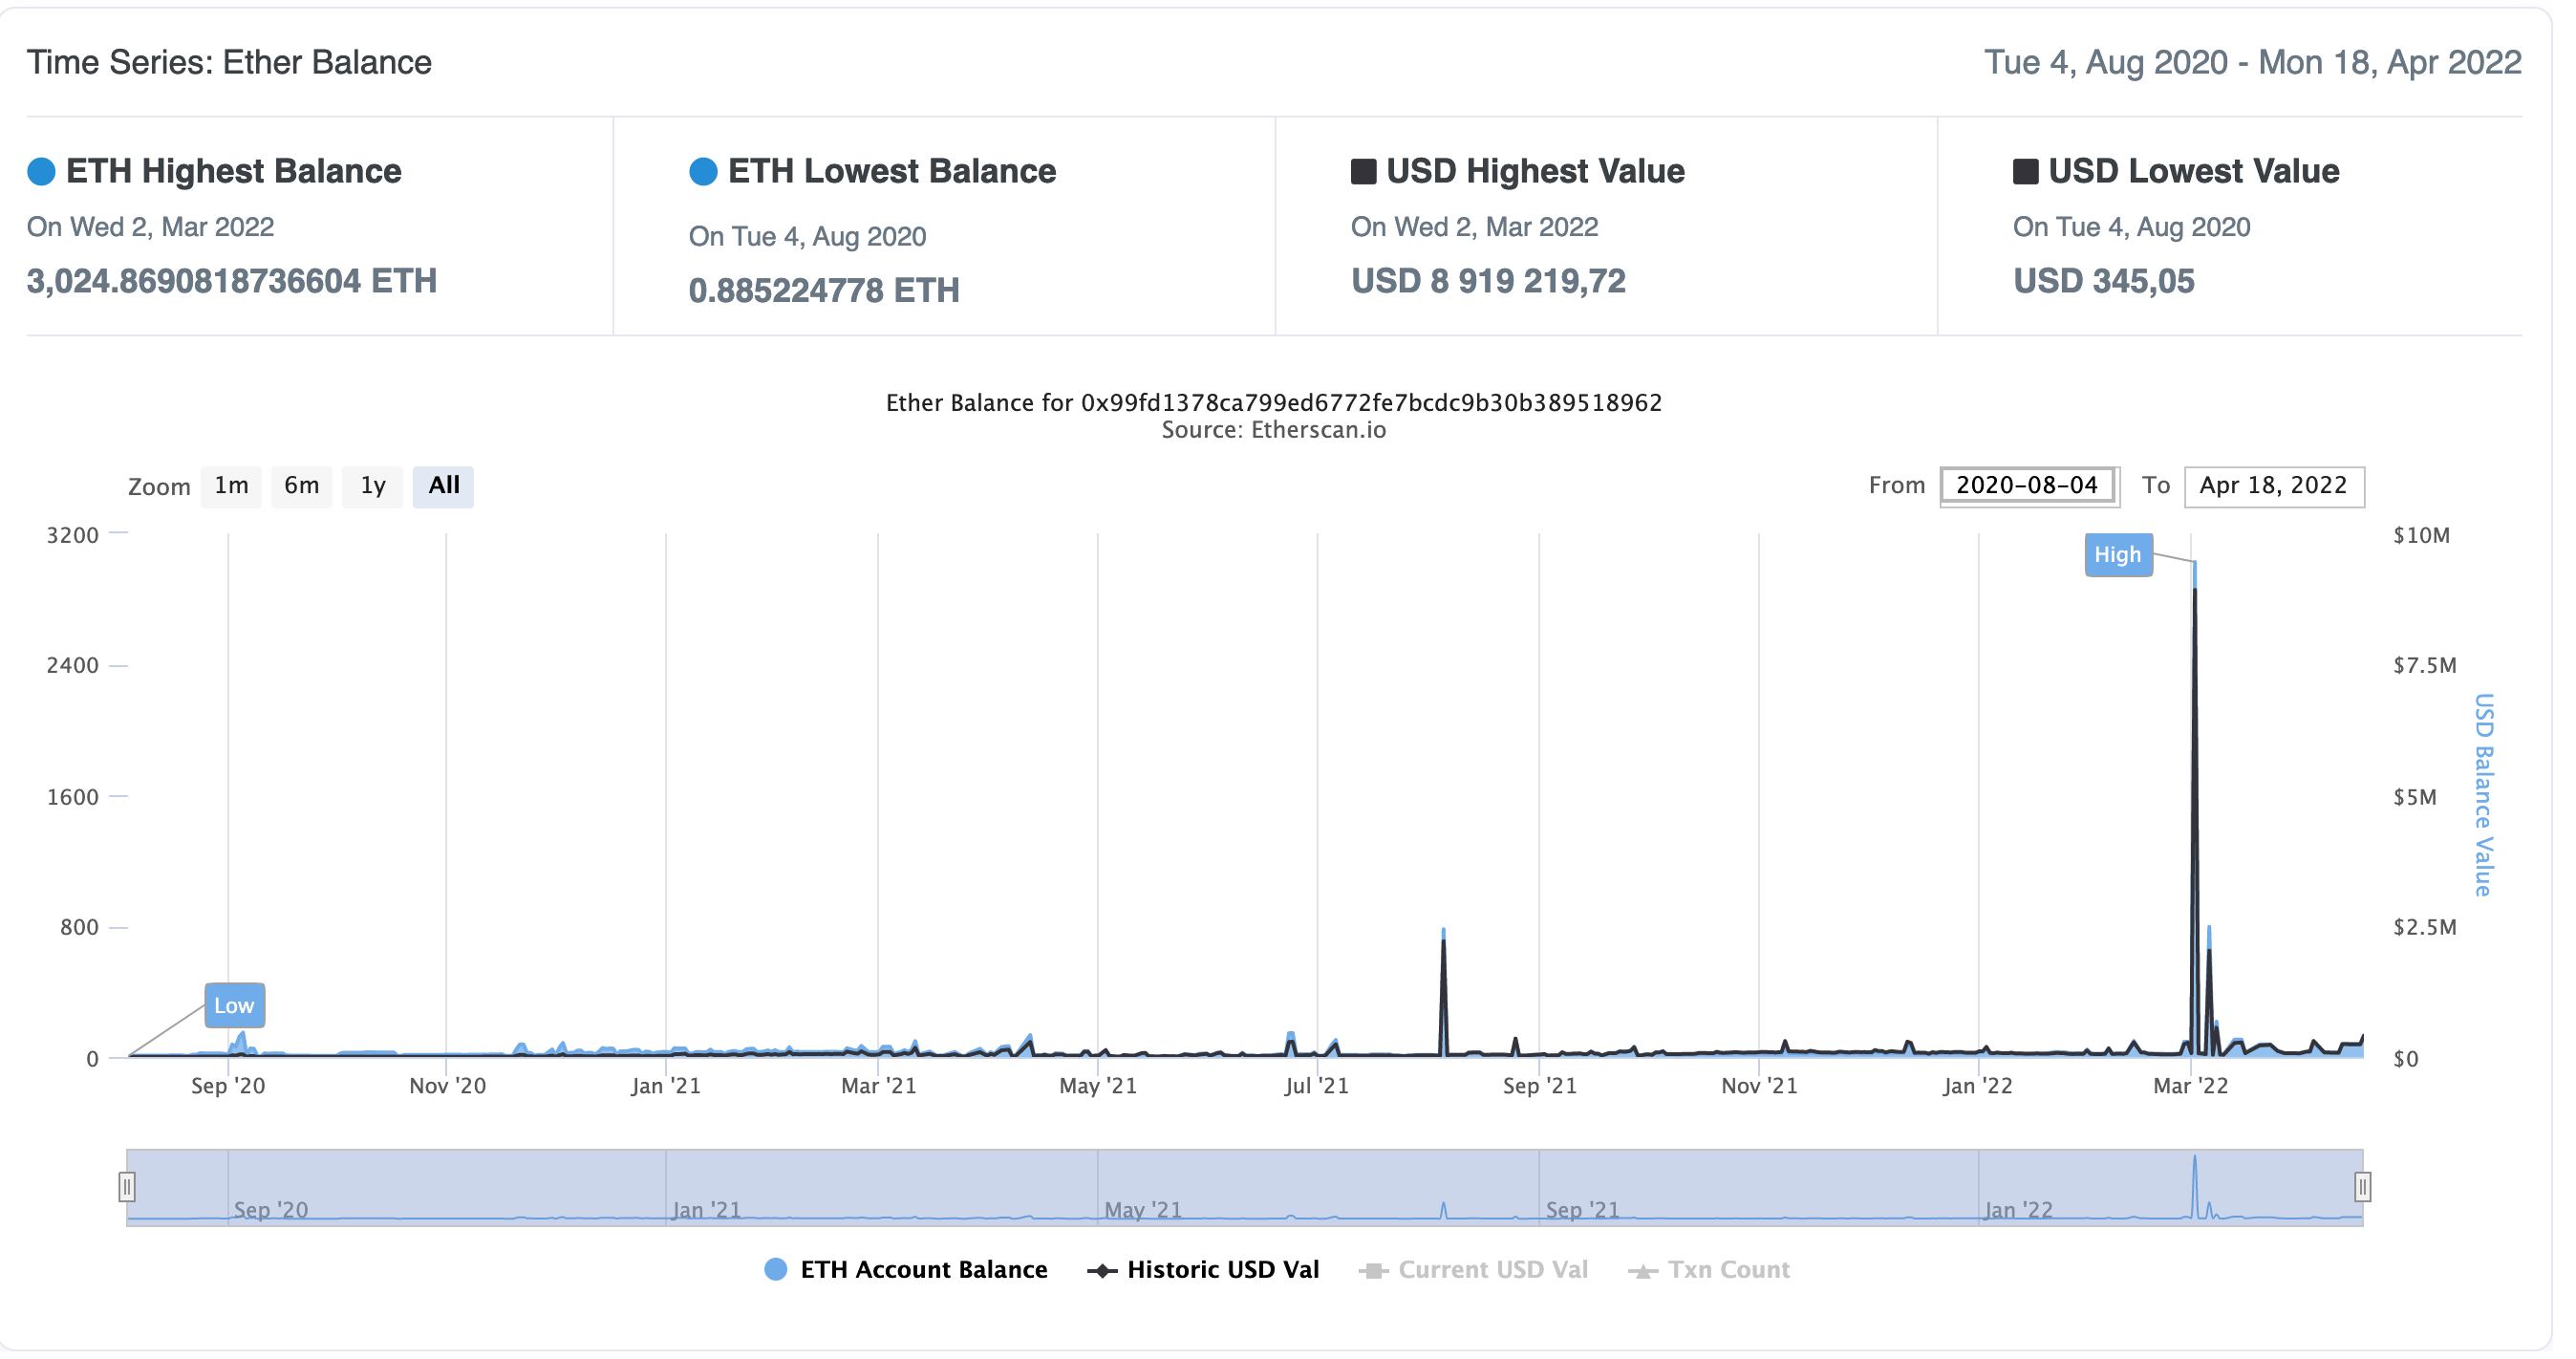

We see that the first replenishment of balance was in August, 4 in 2020 and last transaction was on 18 April, 2022. The maximum balance was achieved on March, 2022. This user incredible increased his balance at the begining of the March. I suspect it could be related with russian special war operation which officially started at 24 February, 2022. But this hypothesis are needed in checking.

The next step is analysing of transactions dynamic, which is introduced in the plot below.

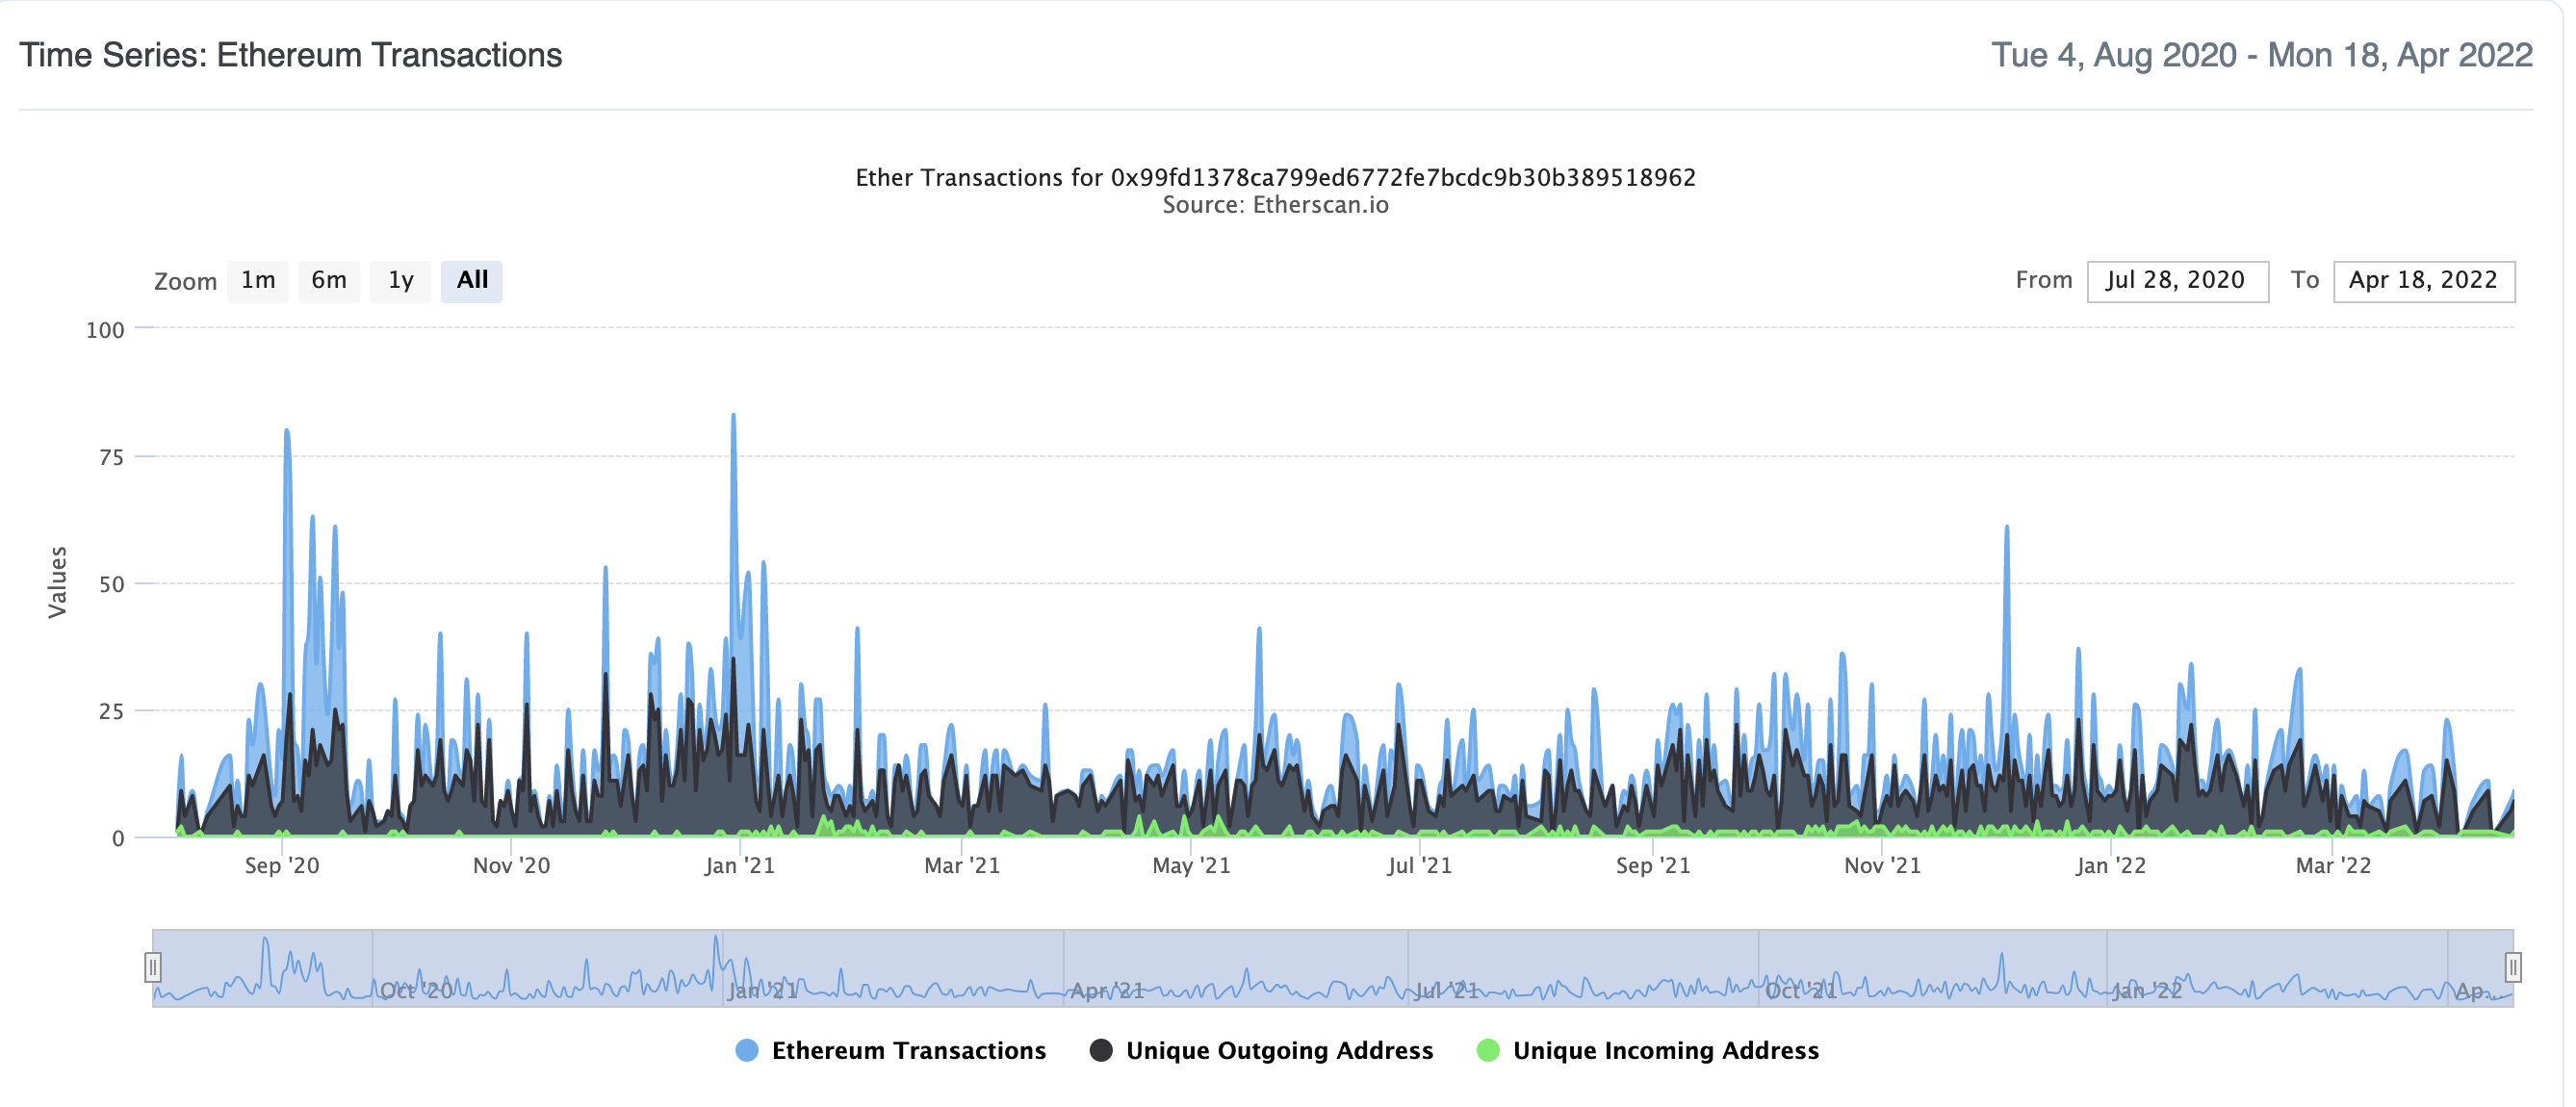

We can observe that the most frequent transaction periods were periods with the lowest balance.
Total amount of transactions is 7514.

Next step is analysis of the transfers both for ethers and tokens.

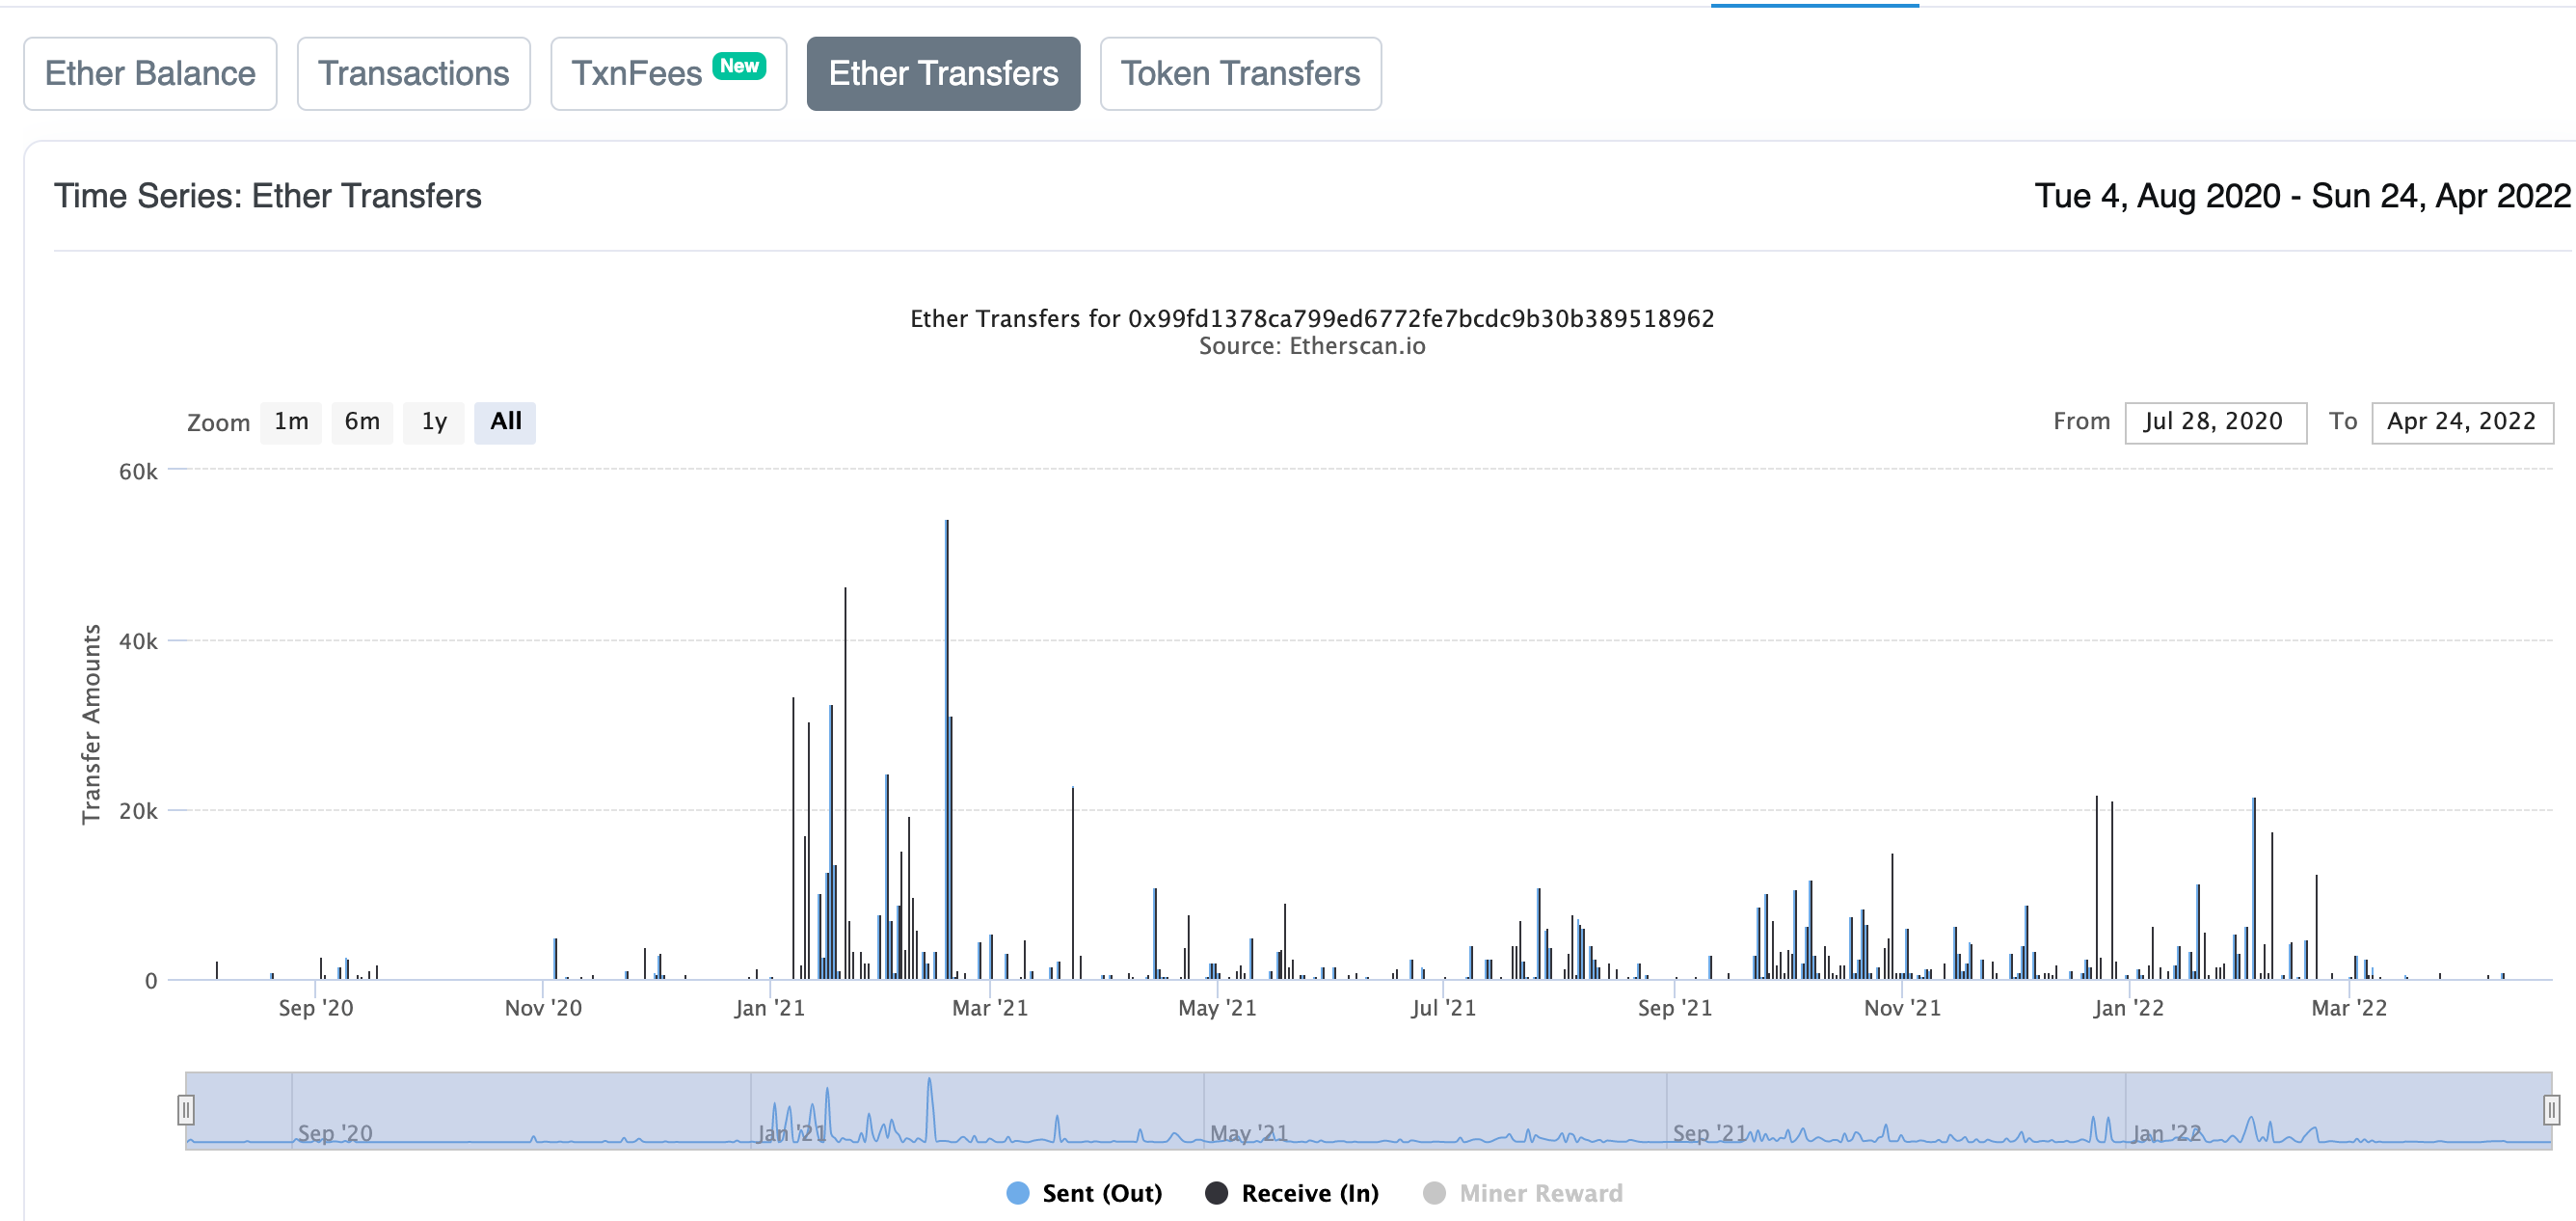

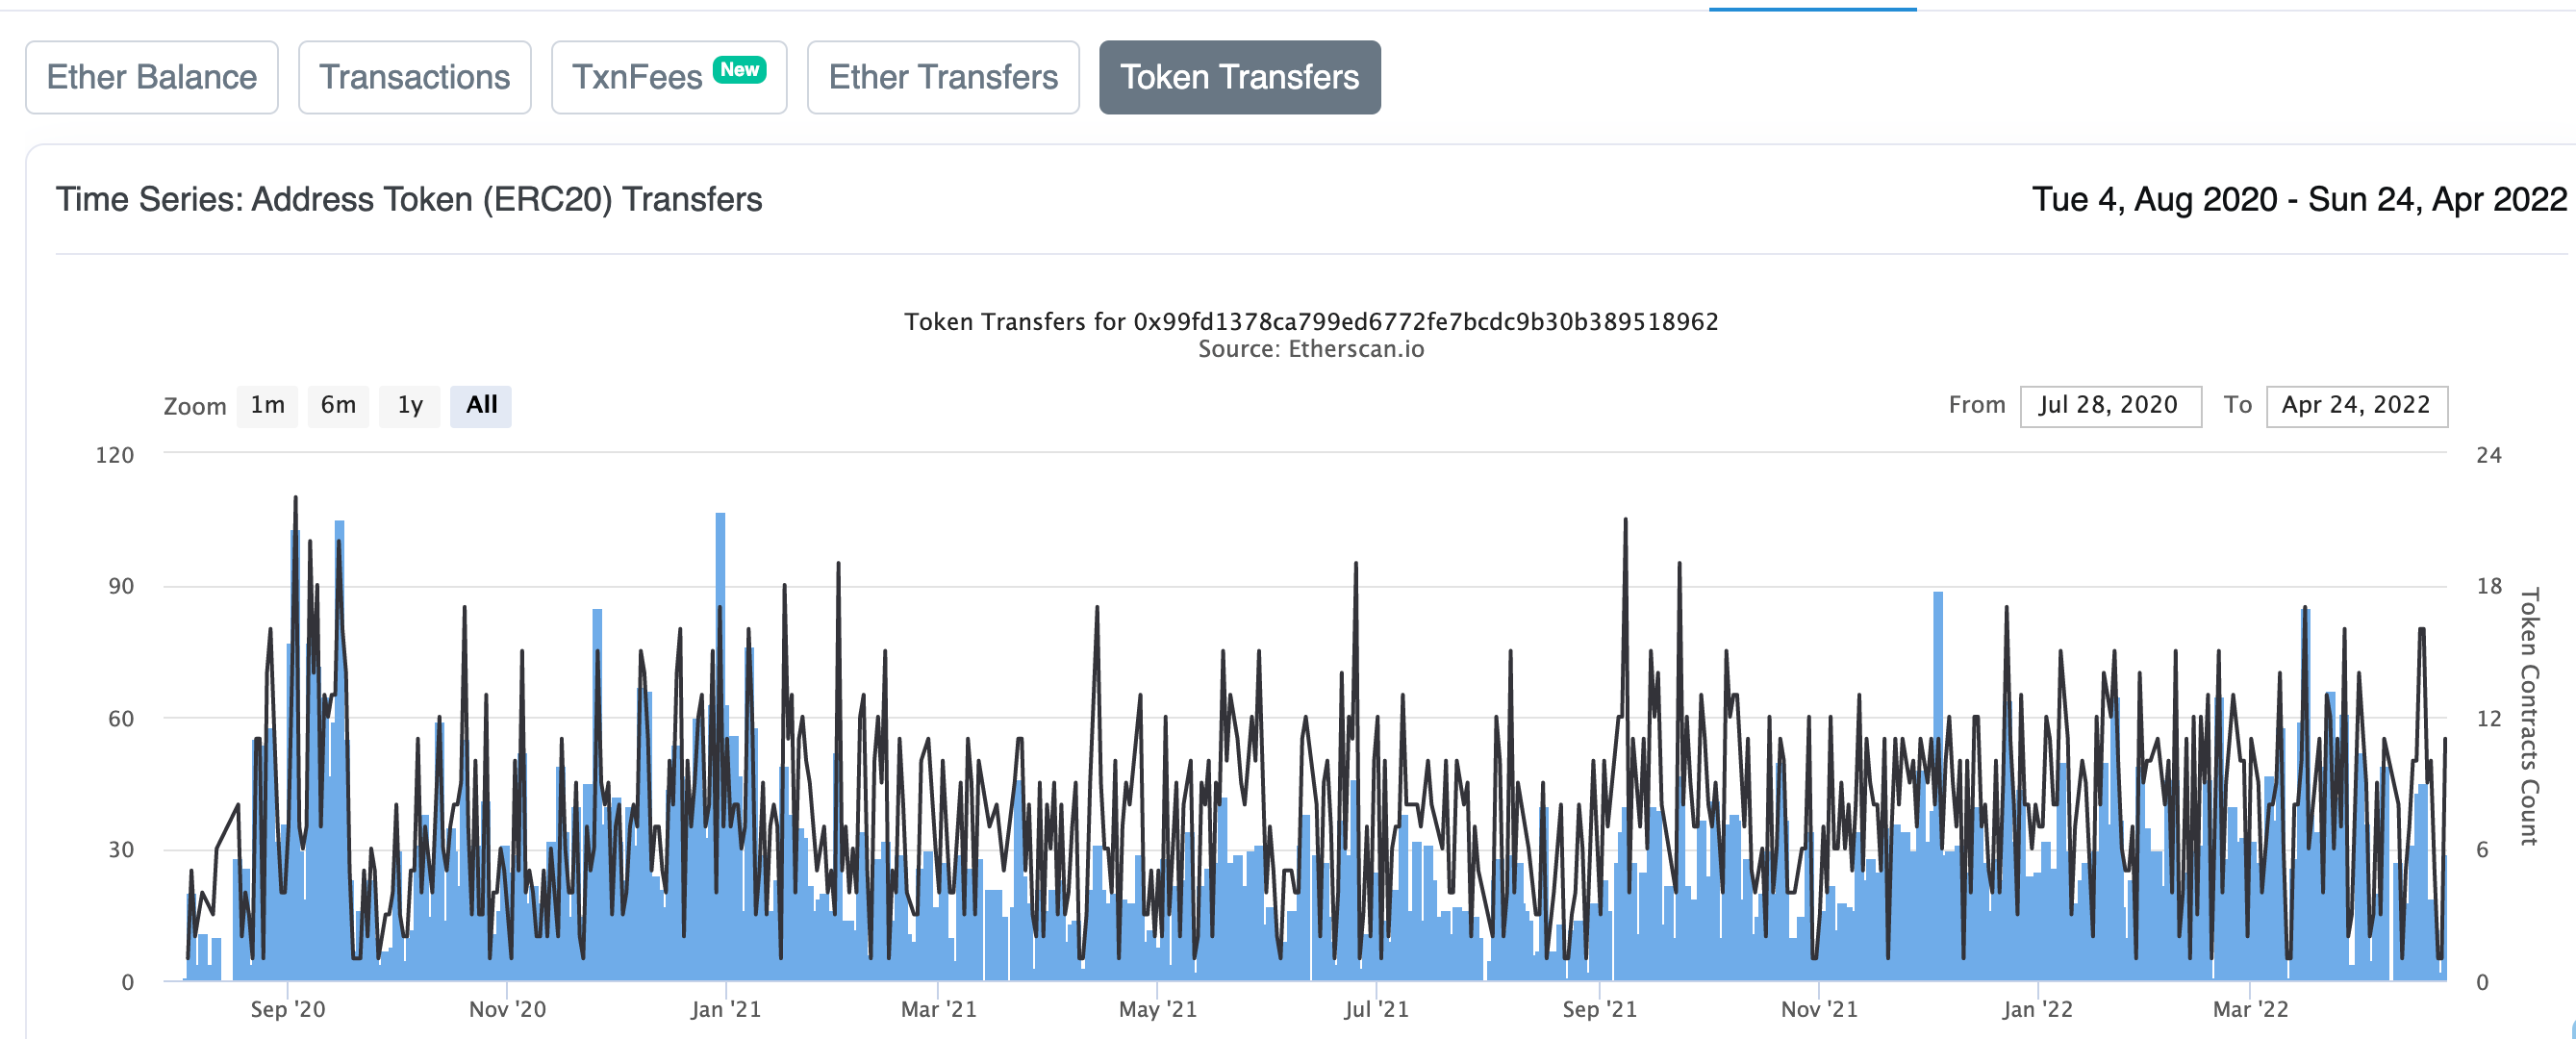

These two plots above show that user was more active in token transfers that ether transfers.

## Token activity

General user's token activity could be researched ![here](https://etherscan.io/tokenholdings?a=0x99fd1378ca799ed6772fe7bcdc9b30b389518962)

Net worth in USD on 27 April is more than 130 mln dollars that equivalent to 45603 ETH. All this assets are in wallet.

Picture below shows the main tokens user has by 27 April 2022.

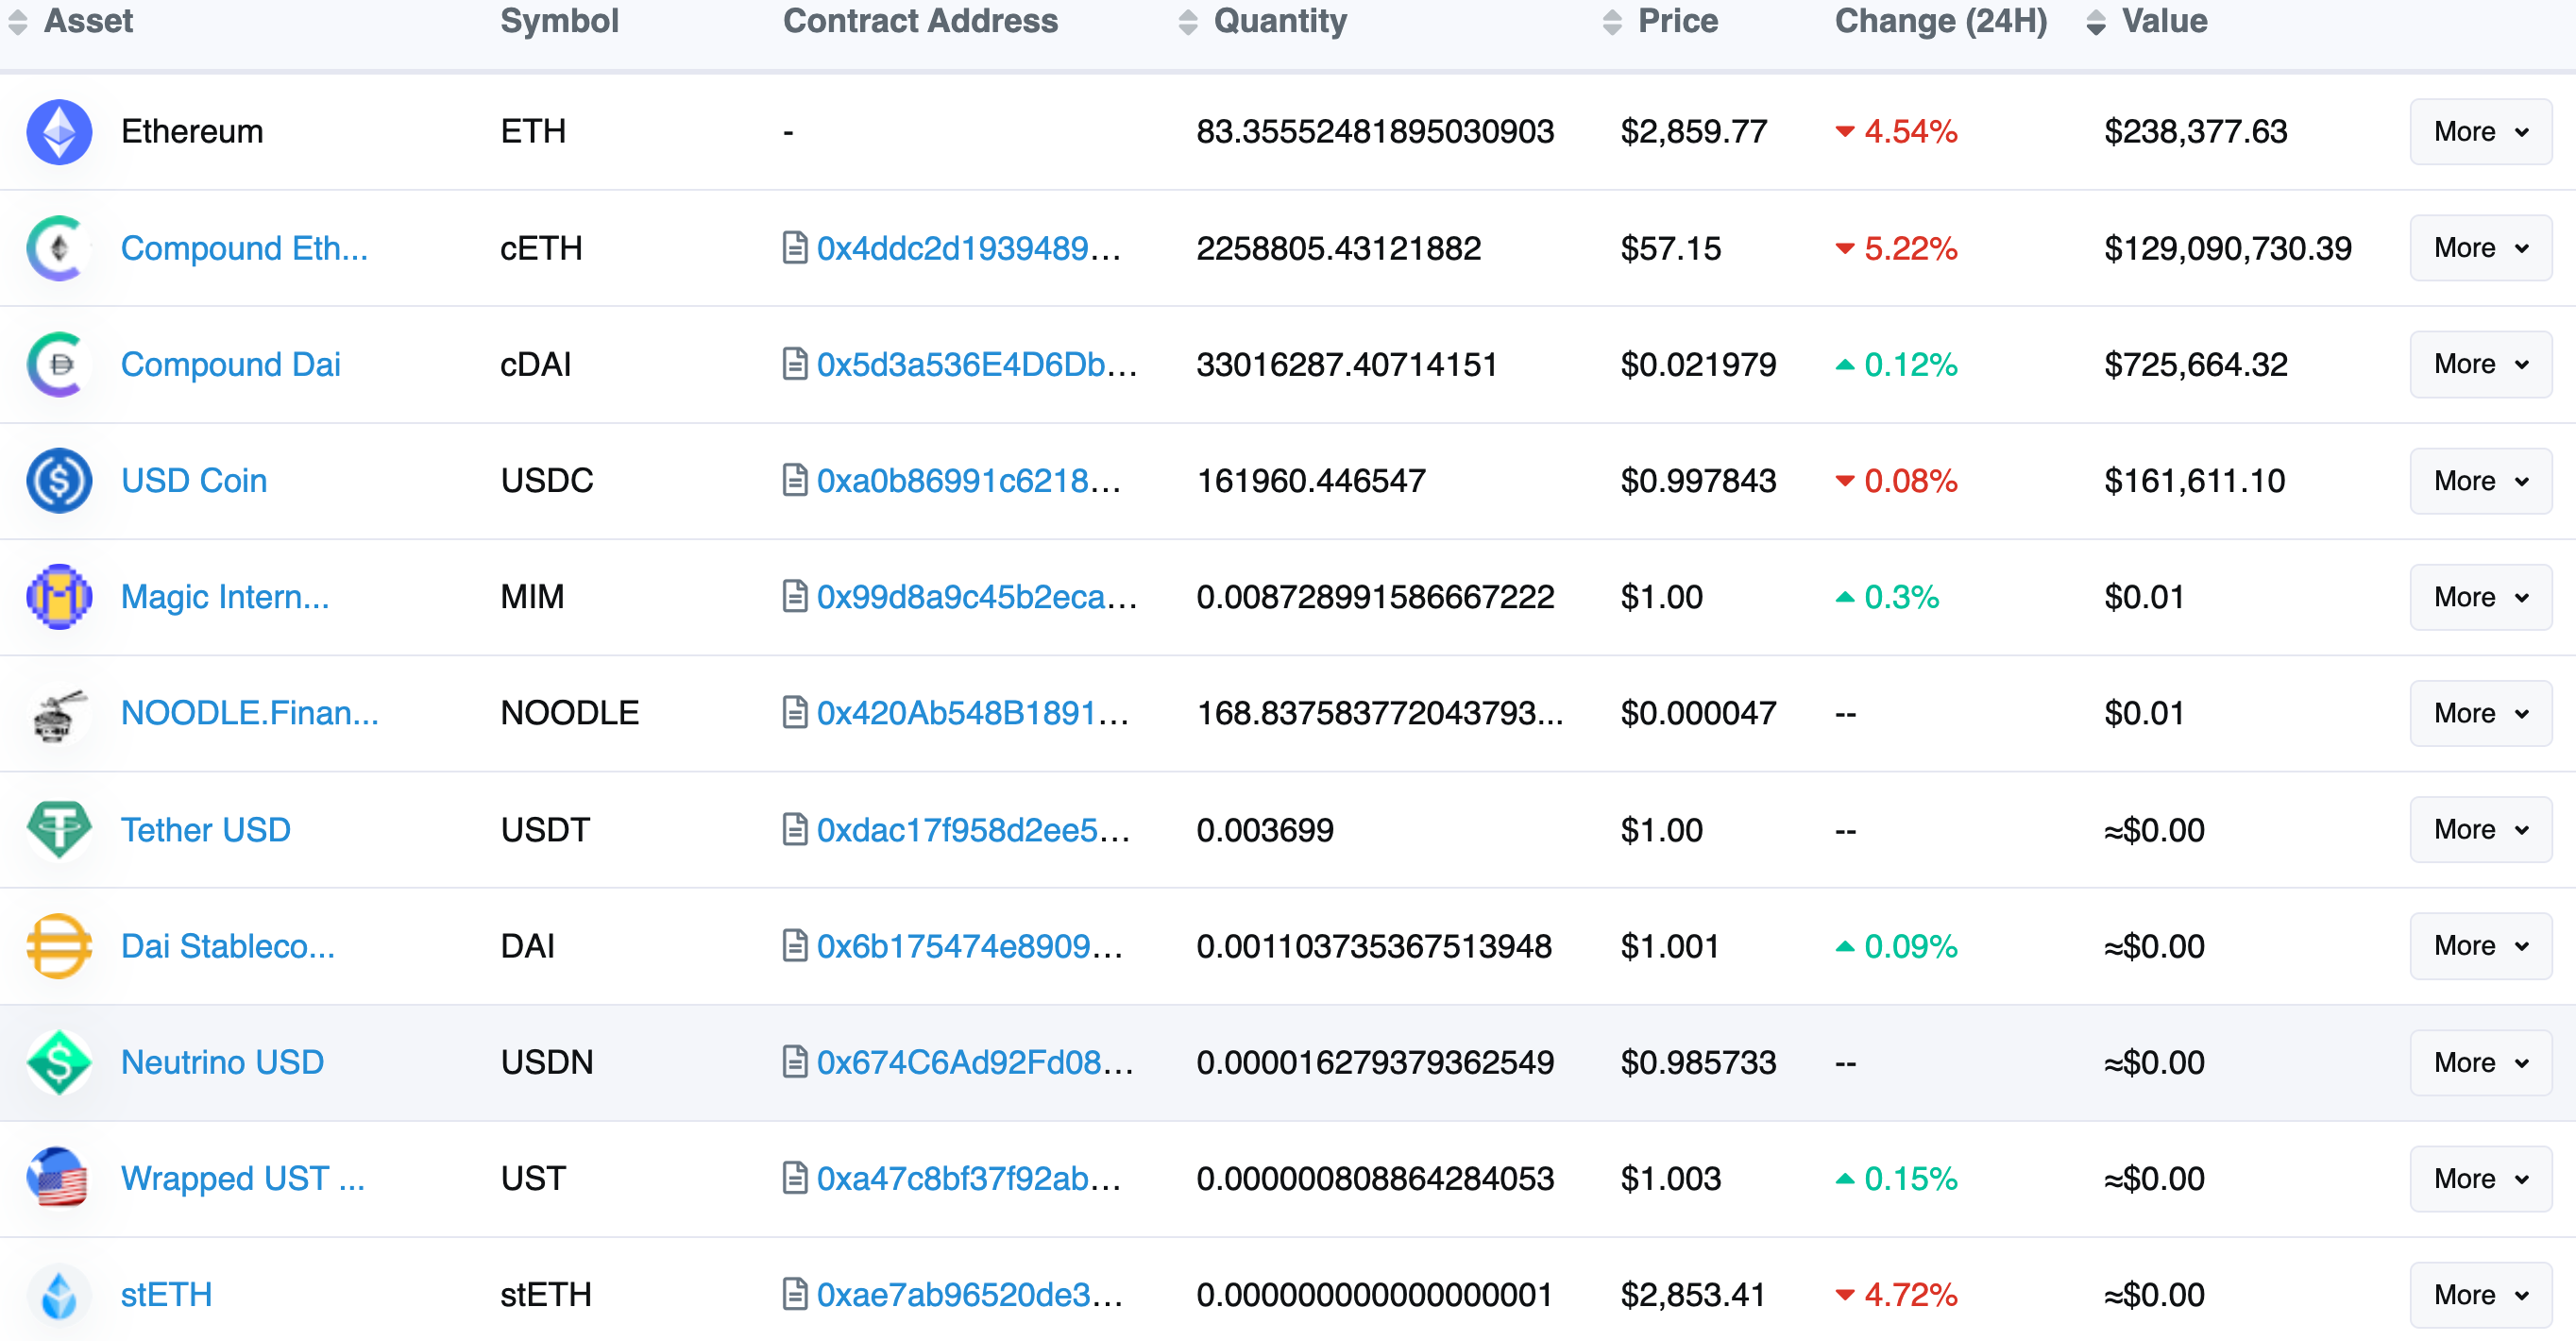

Obviously, cETH (compound Ethereum) is the main token user has - more than 99% of token USD value belongs to it. Compound is an algorithmic money market protocol on Ethereum which are used for earning interest or borrow assets against collateral. Except compound tokes use preferes to invest in stable coins like USDC, MIM, USDT, DAI, USDN, UST.

# 2. Download data

Before start analysing of user behavior, we must download all data we need. Firstly, I downloaded two .csv files with all historical transactions for this user. Etherscan provides only last 5000 observations. Due to user made approximately 7.5k transactions, I downloaded two .csv files.

After general transaction I needed to import transactions with tokens, because it's main activity for that user. Transactions with token I downloaded from [here](https://etherscan.io/tokenholdings?a=0x99fd1378ca799ed6772fe7bcdc9b30b389518962).
Prices for cETH and cDAI I downloaded from [here](https://coincodex.com/).
Prices for stablecoins are 1 USD.

Therefore, I manually downloaded a few files which I saved in data/ folder.

However, I encountered with problem that not all information about ETH and token flows are reflected in these files. For example, I can't following all balance changing in Ethereum for this user because all information contains in transaction's page but not all page with all transactions.

Let's see on this screenshot for transaction 0x857a2867ed34dae08d171e6fe0061e63cc49ec794179acdc2d2040f678861a03:

![image.png](attachment:image.png)

Here we see that user actively swapped WBTC on WETH. But this information are not reflected here:


Here we see that user actively swapped WBTC on WETH. But this information are not reflected here:


In [68]:
import re
%load_ext autoreload
%autoreload 2
%aimport

import pandas as pd
import numpy as np
import plotly.express as px

from application.load_transaction_data import load_ether_data, load_token_data
transactions_df = load_ether_data().query("Status != 'Error(0)'")
token_df = load_token_data()
transactions_transfers_df = pd.read_pickle("transactions_transfers_df")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [69]:
transactions_transfers_df

,Txhash,from,to,usd,amount,token_hash,transfer_amount,transfer_from,transfer_to
0,0x34fb44547d23e56c86714983cbf03c0458ad3cf293b3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0x737ffe7ffbe93453638f267f02b61ba74468beb019b0...,Null Address: 0x000…000,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,empty,15810610.785328,0x3b96d491f067912d18563d56858ba7d6ec67a6fa,NaN,NaN,NaN
1,0x737ffe7ffbe93453638f267f02b61ba74468beb019b0...,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,0x3b96d491f067912d18563d56858ba7d6ec67a6fa,empty,16463939.590037,0x4f3e8f405cf5afc05d68142f3783bdfe13811522,NaN,NaN,NaN
0,0x59125f5aeda44249e4240b8187be832e5e11ef7ef8b5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0xa62ff885ac9e6176a8a8b8c832716ad50e0191e59329...,Curve.fi: GUSD Liquidity Gauge,0xd4f486ea3c68a307c3e8420232ee44d7604a4e99,empty,5422803.1773,0xd2967f45c4f384deea880f807be904762a3dea07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
0,0xc0eea5128f042f50c8db97380a8b22fd0a97bd987090...,Null Address: 0x000…000,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,1443.68,798.391418,0xd533a949740bb3306d119cc777fa900ba034cd52,NaN,NaN,NaN
1,0xc0eea5128f042f50c8db97380a8b22fd0a97bd987090...,Null Address: 0x000…000,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,1819.91,1006.462004,0xd533a949740bb3306d119cc777fa900ba034cd52,NaN,NaN,NaN
2,0xc0eea5128f042f50c8db97380a8b22fd0a97bd987090...,Null Address: 0x000…000,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,1585.58,876.866187,0xd533a949740bb3306d119cc777fa900ba034cd52,NaN,NaN,NaN
3,0xc0eea5128f042f50c8db97380a8b22fd0a97bd987090...,Null Address: 0x000…000,0x99fd1378ca799ed6772fe7bcdc9b30b389518962,31469.16,17403.293875,0xd533a949740bb3306d119cc777fa900ba034cd52,NaN,NaN,NaN


In [44]:
transactions_transfers_df['ETH_amount'] = np.where(transactions_transfers_df['transfer_to'] == '0x99fd1378ca799ed6772fe7bcdc9b30b389518962',
                                                transactions_transfers_df['transfer_amount'],
                                                -transactions_transfers_df['transfer_amount'])
find_eth_deals_df = transactions_df[['Txhash', 'DateTime', "Method", "Quantity"]]\
    .merge(transactions_transfers_df\
            .query("transfer_to == '0x99fd1378ca799ed6772fe7bcdc9b30b389518962' | transfer_from == '0x99fd1378ca799ed6772fe7bcdc9b30b389518962'")
           .groupby(['Txhash'], as_index=False)['ETH_amount'].sum(),
           on=['Txhash'], how='left')\
    .merge(transactions_df[['Txhash', 'TxnFee(ETH)']], on='Txhash', how="left")
find_eth_deals_df['ETH_final'] = np.where(find_eth_deals_df['Quantity'] != 0, find_eth_deals_df['Quantity'], find_eth_deals_df['ETH_amount'])
find_eth_deals_df['ETH_net'] = find_eth_deals_df['ETH_final'] - find_eth_deals_df['TxnFee(ETH)']
find_eth_deals_df['ETH_cumsum'] = find_eth_deals_df['ETH_net'].cumsum()

In [55]:
find_eth_deals_df[['DateTime', 'ETH_cumsum']]

,DateTime,ETH_cumsum
0,2020-08-04 20:21:33,0.999118
1,2020-08-04 20:26:40,0.884343
2,2020-08-05 18:14:02,10.039743
3,2020-08-05 18:18:49,NaN
4,2020-08-05 19:01:33,2238.565580
...,...,...
7428,2022-04-24 00:36:21,NaN
7429,2022-04-24 00:37:11,NaN
7430,2022-04-24 00:38:04,NaN
7431,2022-04-24 00:40:23,NaN


In [53]:
find_eth_deals_df.set_index("DateTime")['ETH_cumsum'].resample("D").last()

DateTime
2020-08-04         0.884343
2020-08-05         8.563874
2020-08-06              NaN
2020-08-07              NaN
2020-08-08              NaN
                  ...      
2022-04-20              NaN
2022-04-21              NaN
2022-04-22              NaN
2022-04-23              NaN
2022-04-24   -487605.499103
Freq: D, Name: ETH_cumsum, Length: 629, dtype: float64

In [35]:
find_eth_deals_df.set_index("DateTime")['ETH_net'].resample("D").sum().cumsum()

DateTime
2020-08-04         0.884343
2020-08-05         8.563874
2020-08-06         8.563874
2020-08-07         8.563874
2020-08-08         8.563874
                  ...      
2022-04-20   -577645.023239
2022-04-21   -577645.023239
2022-04-22   -577645.023239
2022-04-23   -577645.023239
2022-04-24   -577711.219018
Freq: D, Name: ETH_net, Length: 629, dtype: float64

In [56]:
transactions_df.query("DateTime >= '2020-09-02' & DateTime < '2020-09-03'")

,Txhash,Blockno,DateTime,From,To,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $2834.95/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,Quantity,Value_USD
232,0x52b25346387d60c526de43ec5ce71574852cbe40bcb2...,10778461,2020-09-02 00:02:03,user,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.0,0.000000,0.000000e+00,0.010723,30.399736,439.83,NaN,NaN,Withdraw,-0.000000,-0.000000
233,0xc1da604638595e6c1dcdc1ee221acd3d0f353557648a...,10778499,2020-09-02 00:10:01,user,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.0,650.000000,1.842718e+06,0.051036,144.683147,439.83,NaN,NaN,Swap Exact ETH For Tokens,-650.000000,-285889.500000
234,0x2d50f9a2f00594c941af9271ba400f604964234cdf40...,10778554,2020-09-02 00:23:40,user,Centre: USD Coin,0.0,0.000000,0.000000e+00,0.023909,67.781613,439.83,NaN,NaN,Approve,-0.000000,-0.000000
235,0xc96f019a1bfb8d736a709bbfa63d5fe792c6b34434dc...,10778590,2020-09-02 00:31:49,user,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.0,648.496251,1.838454e+06,0.070165,198.914153,439.83,NaN,NaN,Add Liquidity ETH,-648.496251,-285228.106255
236,0x43d415da915f353e7c9a1971b8f7da1f1d80a9778a53...,10778597,2020-09-02 00:33:07,user,0xaeade605d01fe9a8e9c4b3aa0130a90d62167029,0.0,0.000000,0.000000e+00,0.114519,324.655299,439.83,NaN,NaN,Swap Then Burn,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0xfbb0d9a08bcd50886ba8d6fb64b5f885d3740126eb1f...,10783359,2020-09-02 18:01:25,user,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.0,0.000000,0.000000e+00,0.081731,231.702023,439.83,NaN,NaN,Remove Liquidity ETH,-0.000000,-0.000000
306,0x1f26ed8e8f01a5a8842e3207562079270071bb43807c...,10783368,2020-09-02 18:03:00,user,0xdac17f958d2ee523a2206206994597c13d831ec7,0.0,0.000000,0.000000e+00,0.025279,71.663425,439.83,NaN,NaN,Approve,-0.000000,-0.000000
307,0x43954a0f7c8fc8954e287739c1d273c0026fae4b128d...,10783374,2020-09-02 18:04:17,user,0xa5407eae9ba41422680e2e00537571bcc53efbfd,0.0,0.000000,0.000000e+00,0.067305,190.806310,439.83,NaN,NaN,Exchange,-0.000000,-0.000000
308,0xa5af9b1a79606f352d6dc0683a353ec507a6bd4a5bc8...,10783379,2020-09-02 18:05:34,user,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.0,695.562840,1.971886e+06,0.094909,269.061136,439.83,NaN,NaN,Add Liquidity ETH,-695.562840,-305929.403807


In [36]:
find_eth_deals_df.query("DateTime >= '2020-08-24' & DateTime < '2020-08-25'")

,Txhash,DateTime,Quantity,ETH_amount,TxnFee(ETH),ETH_final,ETH_net,ETH_cumsum
103,0x17971ef4434ae84c68622214166659d7f6dcba2d7e99...,2020-08-24 02:36:04,-0.000000,NaN,0.011428,NaN,NaN,NaN
104,0x4433d06b68616f40b25f16ad94fa53c49881bfeeb105...,2020-08-24 02:38:01,-0.000000,NaN,0.013238,NaN,NaN,NaN
105,0x4ed422853810b505c5e28e6204cb5db92c84be5ea0da...,2020-08-24 02:38:08,-0.000000,NaN,0.012293,NaN,NaN,NaN
106,0x292a25ec1246664b5162a2f684fd85cf53b889bc5aac...,2020-08-24 02:39:17,-0.000000,NaN,0.008589,NaN,NaN,NaN
107,0xfa448179e90e30c519587991932cca295e27ba69cd11...,2020-08-24 02:39:51,-0.000000,NaN,0.007474,NaN,NaN,NaN
108,0xadae5c6e83c774e5aee061a3652778ff14152736eab3...,2020-08-24 02:41:14,-0.000000,NaN,0.007810,NaN,NaN,NaN
109,0x8cc2c40cbdcf3796133ae4d6db6fcc9806793e0c30be...,2020-08-24 02:43:32,-0.000000,NaN,0.002931,NaN,NaN,NaN
110,0xe3cc3273e114d2e188f447465f311b6a7c3cc2836080...,2020-08-24 02:46:10,-0.000000,NaN,0.011622,NaN,NaN,NaN
111,0x83b6adc49651af7faaef3f4f5fcd2abeda98057a43ce...,2020-08-24 02:50:07,-0.000000,NaN,0.011174,NaN,NaN,NaN
112,0xa510b919b4425ac57bb0df6efa780d1aad68cd3461dc...,2020-08-24 02:50:49,-0.000000,NaN,0.011423,NaN,NaN,NaN


In [47]:
transactions_transfers_time_df = transactions_transfers_df.merge(transactions_df[['Txhash', 'DateTime', "Method", "Quantity"]],
                                                                 on='Txhash', how='left')

In [67]:
transactions_transfers_time_df.query("token_hash == '0xB4e16d0168e52d35CaCD2c6185b44281Ec28C9Dc'")

,Txhash,from,to,usd,amount,token_hash,transfer_amount,transfer_from,transfer_to,ETH_amount,DateTime,Method,Quantity


## Total tokens value in USD

In [4]:
px.line(token_df['Value_USD'].resample("D").sum().cumsum())

Graph above shows that we can highlight four period:
1. Sep 2020 - Apr 2021. Value of tokens in USD was quite low comparing with all periods.
2. May 2021 - Sep 2021. Value of tokens in USD reached almost historical peak and afterwards returned to zero.
3. Oct 2021 - Jan 2022. Value of tokens in USD was about around 0-50 mln dollars that correspondence with minimal historical period.
4. Feb 2022 - Now. User incredibly increased his tokens in USD.

Therefore, I suspect that user had 4 different strategies across all historical period.

Lets' start with period Feb 2022 - nowadays.

# 3. Feb 2022 - nowadays

In [5]:
# Merge with ETHER transactions
token_ether_df = pd.concat([token_df\
                           .drop(columns=['Date', 'Volume', 'Market Cap', 'UnixTimestamp'])\
                           .reset_index()
                            ,
                            transactions_df\
                            .drop(columns=['ErrCode', 'TxnFee(USD)', 'Status',
                                           'Value_OUT(ETH)', 'Value_IN(ETH)'])
                            .rename(columns={"Historical $Price/Eth": 'Price'})\
                            .assign(token="Ether")\
                            .query("Quantity != 0")
                            ]).sort_values("DateTime")
token_ether_df

,DateTime,Txhash,Blockno,From,To,Quantity,Method,token,Price,Value_USD,CurrentValue @ $2834.95/Eth,TxnFee(ETH)
0,2020-08-04 20:21:33,0x4c3b415bb98370a9ef572567a4e13b61759763c08192...,10595414,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,user,1.000000e+00,Transfer,Ether,389.79,3.897900e+02,2.834950e+03,0.000882
1,2020-08-04 20:26:40,0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...,10595437,user,0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81,-1.000000e-01,0x4e7ffa04,Ether,389.79,-3.897900e+01,2.834950e+02,0.014775
0,2020-08-04 20:26:40,0xdf08f1b6048a3c151737d797c5a5da5892cff66dfdfd...,10595437,0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81,user,3.912624e+01,-,USDC,1.00,3.912624e+01,NaN,NaN
2,2020-08-05 18:14:02,0x88877e0aff3d534341cbb11d9fa19e5c807a164efd3f...,10601283,0x04045a6c0a9f6ece044510c51b974400ade3ca5b,user,9.156451e+00,Transfer,Ether,401.12,3.672836e+03,2.595808e+04,0.001050
4,2020-08-05 19:01:33,0x12c77d689b0a62785e4ab18999382e8ce24c2b927bad...,10601518,FTX Exchange 2,user,2.228527e+03,Transfer,Ether,401.12,8.939067e+05,6.317762e+06,0.000983
...,...,...,...,...,...,...,...,...,...,...,...,...
2526,2022-04-24 00:36:05,0x3f47026093d13668760dc35418cb4983b374e9ebdc5a...,14644314,user,Compound: cETH Token,-1.120859e+02,Mint,Ether,2922.37,-3.275564e+05,3.164498e+05,0.003387
3537,2022-04-24 00:36:21,0x2e2926cccdc525856f0aa64e70917ffbec4a02f557f1...,14644315,Compound: cUSDT Token,user,3.000000e+06,Borrow,TetherUSD,1.00,3.000000e+06,NaN,NaN
3538,2022-04-24 00:38:04,0x167c46dd943aa9ff360ff99fbf2683fc6e78c377f472...,14644327,user,Curve.fi: cyDAI/cyUSDT/cyUSDC Pool,-3.366310e+06,Add_liquidity,TetherUSD,1.00,-3.366310e+06,NaN,NaN
2531,2022-04-24 12:20:07,0xb7e6d1118f9b99cf1575d55dcefbee3b013b72e732b2...,14647406,FTX Exchange 2,user,4.589402e+01,Transfer,Ether,2922.37,1.341193e+05,1.295717e+05,0.000553


Main method for receiving ETH in this period - *transfer* - 100% of all incoming transactions were produced by this method.

![image-3.png](attachment:image-3.png)

Main senders were FTX Exhange 2 (more than 50% of total) and these two users:

0x2a67035357C3045438F3A92E46870a9E48e5AAB7 (suspected_user1)

0x937cdc9e86ba06aa5aaea221017a1d9fc7f59efd (suspected_user2)

I suspect that these are two another acounts of out user.

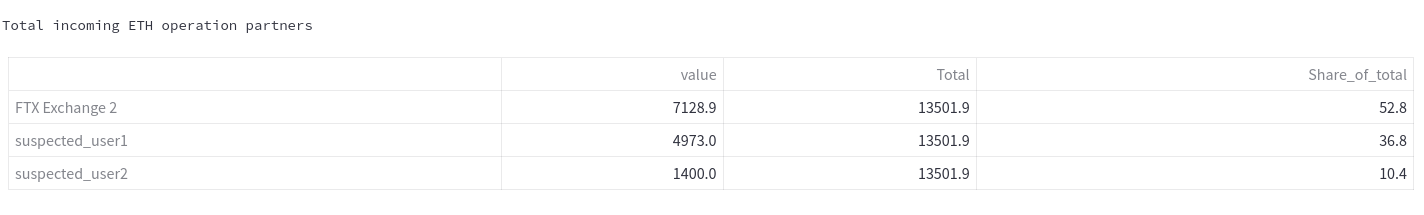

The two main methods for receiving ETH were Mint (almost 2/3) and Repay Behalf (more than 1/4). These methods are included more than 75% of all outgoing transactions with Ethereum.

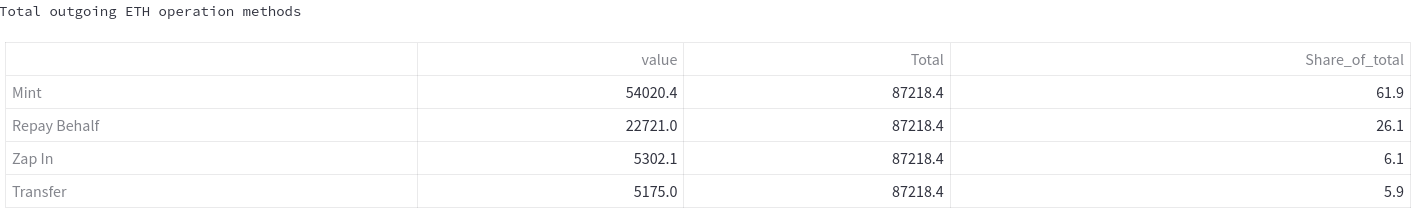


Apparrently, that choice of main tokens for investment was dependent on two main methods above. Accordingly, two main receivers were Compound ETH token and Compound: Contract 1.

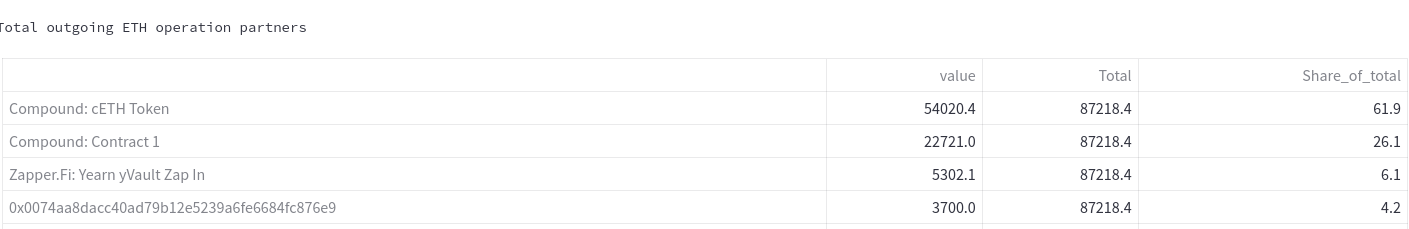

Therefore, this brief descriptive statistics allows to make a first conclusion, that in the period of Feb 2022 to nowdays, our user ***tried to invest his own ETH to Compound Token to earn interest.***. Notice, that he got ETH from another blockchain, was using exchange. Once hypothesys could be the following: *he does cyclic staking - steaks his ethers in Compound, then puts them as collateral for a loan of stablecoins, then uses stablecoins in DeFi, but in another blockchain, where the yield is higher*.

The Compound Protocol is a series of interest rate markets running on the Ethereum blockchain. When users and applications supply an asset to the Compound Protocol, they begin earning a variable interest rate instantly. Interest accrues every Ethereum block (currently ~13 seconds), and users can withdraw their principal plus interest anytime.



To check hypothesis above, we should analyse token moving deeply.

![image.png](attachment:image.png)

This plot demonstates that user was steadily grewing up his token value in USD.


The main incoming methods with tokens were related to borrowing, minting, removing liquidity and transfering.

![image.png](attachment:image.png)



The main outgoing methods with tokens were related to repaying debts, adding liquidity, exchanging underlying assets (ETH).

![image.png](attachment:image.png)

This statistics can approve hypothesis that user earn money on lending staiblecoins (ETH as collateral) in  Ethereum blockchain to invest in DeFi in more profitable blochchains. Afterwards, he can return money to Ethereum blockchain and repeat this schema again. 

In [ ]:
token_df.query("DateTime >= '2022-02-01'").sort_values("DateTime", ascending=False).head(60)

In [ ]:
token_df.query("DateTime >= '2022-02-01'").query("Price == 1")\
.reset_index().pivot_table(index="DateTime", columns = 'token', 
             values = 'Value_USD', aggfunc=np.abs)

In [ ]:
transactions_df.query("Method == 'Cook'")

In [ ]:
transactions_df.query("Method == 'Cook'")['To'].value_counts()

To check hypothesis above, we should analyse token moving deeply.

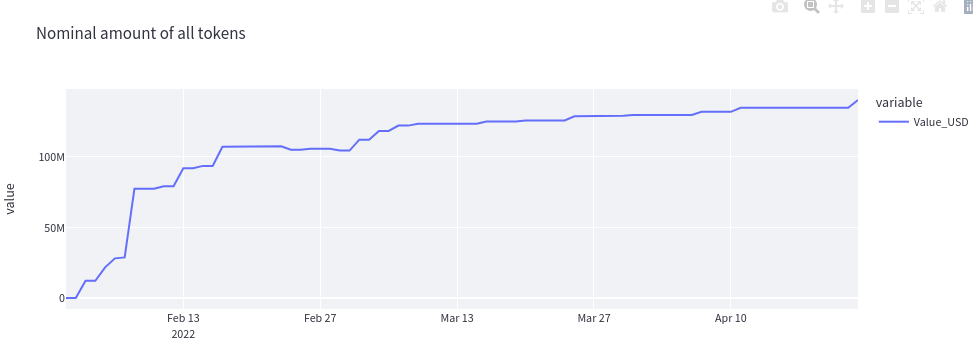

This plot demonstates that user was steadily grewing up his token value in USD.


The main incoming methods with tokens were related to borrowing, minting, removing liquidity and transfering.

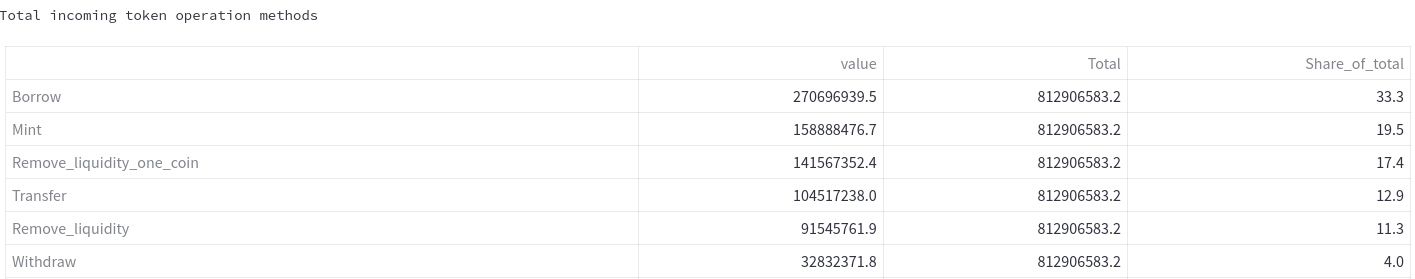



The main outgoing methods with tokens were related to repaying debts, adding liquidity, exchanging underlying assets (ETH).

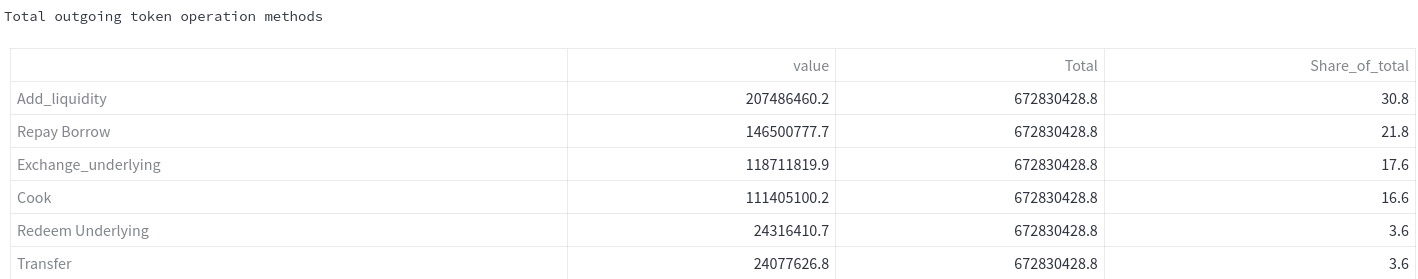

This statistics can approve hypothesis that user earn money on lending staiblecoins (ETH as collateral) in  Ethereum blockchain to invest in DeFi in more profitable blochchains. Afterwards, he can return money to Ethereum blockchain and repeat this schema again. 

In [12]:
token_df.query("DateTime >= '2022-02-01'").sort_values("DateTime", ascending=False).head(60)

,Txhash,Blockno,UnixTimestamp,From,To,Quantity,Method,token,Date,Volume,Market Cap,Price,Value_USD
DateTime,,,,,,,,,,,,,
2022-04-24 12:21:42,0x41e57623f6c0d31994a0466cfac089c64bbb135719a5...,14647418,1650802902,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2,user,1.619604e+05,Transfer,USDC,2022-04-24,NaN,NaN,1.00000,1.619604e+05
2022-04-24 00:38:04,0x167c46dd943aa9ff360ff99fbf2683fc6e78c377f472...,14644327,1650760684,user,Curve.fi: cyDAI/cyUSDT/cyUSDC Pool,-3.366310e+06,Add_liquidity,TetherUSD,2022-04-24,NaN,NaN,1.00000,-3.366310e+06
2022-04-24 00:36:21,0x2e2926cccdc525856f0aa64e70917ffbec4a02f557f1...,14644315,1650760581,Compound: cUSDT Token,user,3.000000e+06,Borrow,TetherUSD,2022-04-24,NaN,NaN,1.00000,3.000000e+06
2022-04-24 00:36:05,0x3f47026093d13668760dc35418cb4983b374e9ebdc5a...,14644314,1650760565,Compound: cETH Token,user,5.586871e+03,Mint,cETH,2022-04-24,1549.617348,3.378011e+09,58.27825,3.255930e+05
2022-04-24 00:35:29,0x9064b75f900ee7bb958360f6e8b249d3b59a8fbc8ae8...,14644312,1650760529,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,user,1.902475e+05,-,TetherUSD,2022-04-24,NaN,NaN,1.00000,1.902475e+05
2022-04-24 00:35:29,0x7e7d08c1421b5adb5bd322738858f2c1e1c3920a11f1...,14644312,1650760529,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,user,1.760623e+05,-,TetherUSD,2022-04-24,NaN,NaN,1.00000,1.760623e+05
2022-04-24 00:34:55,0x55e90ea21da136fa64da35266fe39c715726fdfbc616...,14644309,1650760495,user,Compound: cUSDC Token,-2.000000e+06,Repay Borrow,USDC,2022-04-24,NaN,NaN,1.00000,-2.000000e+06
2022-04-24 00:32:15,0xf84ff8910eab4d30b0c5d4e98af7d1438043a5abfb0a...,14644298,1650760335,user,Compound: cUSDC Token,-3.500000e+06,Repay Borrow,USDC,2022-04-24,NaN,NaN,1.00000,-3.500000e+06
2022-04-24 00:31:00,0x67cb2053edf80ffbf91788d5ae8cf7f11dea611753a5...,14644292,1650760260,0x7091dbb7fcba54569ef1387ac89eb2a5c9f6d2ea,user,2.032661e+03,Claim Rewards,CurveDAI,2022-04-24,NaN,NaN,1.00000,2.032661e+03


In [17]:
token_df.query("DateTime >= '2022-02-01'").query("Price == 1")\
.reset_index().pivot_table(index="DateTime", columns = 'token', 
             values = 'Value_USD', aggfunc=np.abs)

token,CurveDAI,DAI,MIM,Neutrino,TetherUSD,USDC,WrappedUSD
DateTime,,,,,,,
2022-02-01 03:23:37,347.006524,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01 03:28:34,NaN,NaN,NaN,NaN,69740.53083,NaN,NaN
2022-02-01 03:33:37,NaN,NaN,NaN,NaN,13000000.0,NaN,NaN
2022-02-01 03:37:07,NaN,NaN,NaN,NaN,13069740.53,NaN,NaN
2022-02-01 15:02:33,NaN,NaN,NaN,2000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-24 00:34:55,NaN,NaN,NaN,NaN,NaN,2000000.0,NaN
2022-04-24 00:35:29,NaN,NaN,NaN,NaN,"[176062.273102, 190247.520597]",NaN,NaN
2022-04-24 00:36:21,NaN,NaN,NaN,NaN,3000000.0,NaN,NaN


In [ ]:
transactions_df.query("Method == 'Cook'")

In [9]:
transactions_df.query("Method == 'Cook'")['To'].value_counts()

Abracadabra.Money: yvWETH v2 Market           175
0x0bca8ebcb26502b013493bf8fe53aa2b1ed401c1     13
Abracadabra.Money: yvUSDC v2 Market            12
0x551a7cff4de931f32893c928bbc3d25bf1fc5147      7
0x9617b633ef905860d919b88e1d9d9a6191795341      7
0x05500e2ee779329698df35760bedcaac046e7c27      2
Name: To, dtype: int64

In [6]:
transactions_df.set_index("DateTime")['Quantity'].resample("D").sum().cumsum()

DateTime
2020-08-04         0.900000
2020-08-05         8.583270
2020-08-06         8.583270
2020-08-07         8.583270
2020-08-08         8.583270
                  ...      
2022-04-20   -950817.998094
2022-04-21   -950817.998094
2022-04-22   -950817.998094
2022-04-23   -950817.998094
2022-04-24   -950884.189933
Freq: D, Name: Quantity, Length: 629, dtype: float64